In [1]:
#importing useful packages
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import datetime
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

In [2]:
#USE THIS CELL TO PULL DATA FROM GOOGLE DRIVE, OR USE THE NEXT CELL TO UPLOAD A LOCAL FILE
#IF YOU HAVE THE FILE IN DRIVE IT'S A LOT FASTER
#mount google colab
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/urban economics/d03_text_station_hour_2020_03.txt')
peakTraffic = pd.read_csv('/content/gdrive/My Drive/urban economics/peak_traffic.csv')

Mounted at /content/gdrive


In [3]:
#here we need to manually upload the file we want to analyze

#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['d03_text_station_hour_2020_10.txt']))
#print(df.head())

In [4]:
print('Shape of hourly-interval dataframe: {}'.format(df.shape))
print(df.columns)
print('Shape of peak traffic dataframe: {}'.format(peakTraffic.shape))
print(peakTraffic.columns)


Shape of hourly-interval dataframe: (939913, 42)
Index(['03/01/2020 00:00:00', '308511', '3', '50', 'E', 'ML', '5', '237',
       '100', '31', '.0012', '67.5', '0', '0.1', '0.2', '0.3', '0.4', '0.5',
       '13', '.0009', '71.2', '18', '.0016', '65', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41'],
      dtype='object')
Shape of peak traffic dataframe: (1919, 22)
Index(['Dist', 'Rte', 'County', 'Postmile', 'Census Station', 'Leg', 'Year',
       'AADT', 'Diram', '1-Way PHVam', '% Kam', '% Dam', '% KDam', 'Hram',
       'Dayam', 'Dirpm', '1-Way PHVpm', '% Kpm', '% Dpm', '% KDpm', 'Hrpm',
       'Daypm'],
      dtype='object')


In [5]:
#I want to sum up the null values in each column so I get a sense of how sparse the data is
df.isnull().sum()

03/01/2020 00:00:00         0
308511                      0
3                           0
50                          0
E                           0
ML                          0
5                      348067
237                         0
100                         0
31                      63577
.0012                  338574
67.5                   348067
0                      348067
0.1                    348067
0.2                    348067
0.3                    348067
0.4                    348067
0.5                    348067
13                      98273
.0009                  351969
71.2                   358857
18                     370118
.0016                  520122
65                     526442
Unnamed: 24            629311
Unnamed: 25            646857
Unnamed: 26            648343
Unnamed: 27            792773
Unnamed: 28            793516
Unnamed: 29            793516
Unnamed: 30            910599
Unnamed: 31            910599
Unnamed: 32            910599
Unnamed: 3

In [6]:
#here we export the first 200 rows to a csv so we can look at it.
df.head(200).to_csv("sample-data.csv")
#files.download("sample-data.csv")

In [9]:
#df.dropna(axis=0, subset=['5', '238', '50.1', '199', '.0112', '66.3'], inplace=True)
print('Shape of hourly-interval dataframe: {}'.format(df.shape))
df['numLanes'] = (df.count(axis=1) - 18)/3
print(df.head)
print(df['numLanes'].describe())

Shape of hourly-interval dataframe: (939913, 42)
<bound method NDFrame.head of         03/01/2020 00:00:00   308511  3  ...  Unnamed: 40 Unnamed: 41  numLanes
0       03/01/2020 00:00:00   308512  3  ...          NaN         NaN  2.000000
1       03/01/2020 00:00:00   311831  3  ...          NaN         NaN -2.666667
2       03/01/2020 00:00:00   311832  3  ...          NaN         NaN -2.666667
3       03/01/2020 00:00:00   311844  3  ...          NaN         NaN -2.000000
4       03/01/2020 00:00:00   311847  3  ...          NaN         NaN -2.333333
...                     ...      ... ..  ...          ...         ...       ...
939908  03/31/2020 23:00:00  3075062  3  ...          NaN         NaN -2.666667
939909  03/31/2020 23:00:00  3075063  3  ...          NaN         NaN -2.333333
939910  03/31/2020 23:00:00  3075081  3  ...          NaN         NaN  3.000000
939911  03/31/2020 23:00:00  3075082  3  ...          NaN         NaN -2.666667
939912  03/31/2020 23:00:00  3075083  3  

In [10]:
print('LANES  NUM STATIONS')
print(df.numLanes.value_counts())

LANES  NUM STATIONS
 1.000000    177464
 3.000000    145173
-2.666667    142453
 2.000000    126240
-2.333333    118839
 4.000000    116964
-3.333333     63577
 5.000000     26005
-2.000000     17254
-1.333333      5201
-1.666667       743
Name: numLanes, dtype: int64


In [11]:
#drop data used to impute number of lanes
df.drop(['0', '0.1', '0.2', '0.3', '0.4', '0.5',
       '187', '.0214', '66.3.1', '12', '.0009', '65.2', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
#rename columns
df.columns = ['Timestamp', 'StationID', 'District', 'FreewayNum', 'DirectionOfTravel', 'LaneType', 'StationLength', 'Samples',
       '%Observed', 'TotalFlow', 'AvgOccupancy', 'AvgSpeed', 'numLanes']
print(df.columns)
print(df.head)

Index(['Timestamp', 'StationID', 'District', 'FreewayNum', 'DirectionOfTravel',
       'LaneType', 'StationLength', 'Samples', '%Observed', 'TotalFlow',
       'AvgOccupancy', 'AvgSpeed', 'numLanes'],
      dtype='object')
<bound method NDFrame.head of                   Timestamp  StationID  ...  AvgSpeed  numLanes
0       10/01/2020 00:00:00     308512  ...      63.6       2.0
6       10/01/2020 00:00:00     311903  ...      64.9       3.0
9       10/01/2020 00:00:00     311974  ...      64.4       5.0
11      10/01/2020 00:00:00     312010  ...      67.4       5.0
14      10/01/2020 00:00:00     312098  ...      68.7       4.0
...                     ...        ...  ...       ...       ...
960646  10/31/2020 23:00:00    3075081  ...      67.4       3.0
960649  10/31/2020 23:00:00    3076021  ...      65.1       1.0
960650  10/31/2020 23:00:00    3076022  ...      71.4       4.0
960651  10/31/2020 23:00:00    3084071  ...      64.9       2.0
960652  10/31/2020 23:00:00    3084081  ...

In [ ]:
#we are going to drop the District variable for now since we only downloaded data from district 3
df.drop(['District'], axis=1, inplace=True)
#we need to drop observations without an Average Speed value since that is an essential variable
#we also drop observations without a Total Flow value
#we're going to create a separate dataframe here so I don't have to reload the data when I make a mistake
stations = df.dropna(axis=0, subset=['AvgSpeed', 'TotalFlow'])



In [ ]:
#we calculate flow per lane
stations['flowPerLane'] = (stations['TotalFlow'] / stations['numLanes'])

print(stations.head())


              Timestamp  StationID  FreewayNum  ... AvgSpeed numLanes  flowPerLane
0   10/01/2020 00:00:00     308512          50  ...     63.6      2.0   223.500000
6   10/01/2020 00:00:00     311903          50  ...     64.9      3.0   301.666667
9   10/01/2020 00:00:00     311974          50  ...     64.4      5.0   221.000000
11  10/01/2020 00:00:00     312010          50  ...     67.4      5.0   185.400000
14  10/01/2020 00:00:00     312098          50  ...     68.7      4.0   135.500000

[5 rows x 13 columns]


number of mainline (freeway) observations: 442611
number of HOV observations: 165048 



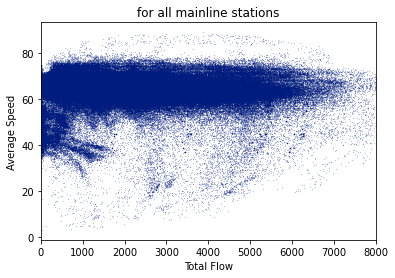

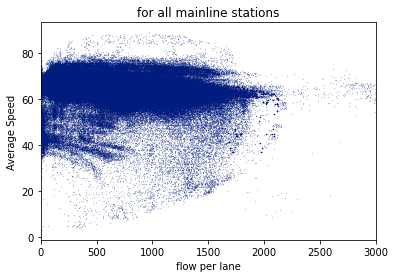

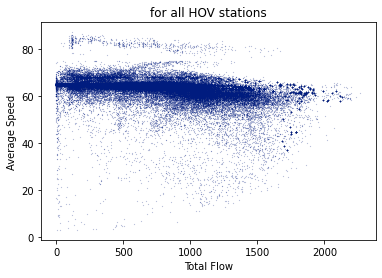

In [ ]:
#CD (Coll/Dist)
#CH (Conventional Highway)
#FF (Fwy-Fwy connector)
#FR (Off Ramp)
#HV (HOV)
#ML (Mainline)
#OR (On Ramp)
CDstations = stations[stations['LaneType']=='CD']
CHstations = stations[stations['LaneType']=='CH']
FFstations = stations[stations['LaneType']=='FF']
FRstations = stations[stations['LaneType']=='FR']
HVstations = stations[stations['LaneType']=='HV']
MLstations = stations[stations['LaneType']=='ML']
ORstations = stations[stations['LaneType']=='OR']

print('number of mainline (freeway) observations: {}'.format(MLstations.shape[0]))
print('number of HOV observations: {} \n'.format(HVstations.shape[0]))


scatter = plt.plot('TotalFlow', 'AvgSpeed', linestyle='', data=MLstations, marker='o', markersize=.1)
plt.xlabel('Total Flow')
plt.ylabel('Average Speed')
plt.title('for all mainline stations')
plt.xlim(0,8000)
plt.show()

scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations, marker='o', markersize=.1)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.title('for all mainline stations')
plt.show()

scatter = plt.plot('TotalFlow', 'AvgSpeed', linestyle='', data=HVstations, marker='o', markersize=.1)
plt.xlabel('Total Flow')
plt.ylabel('Average Speed')
plt.title('for all HOV stations')
plt.show()

0     308512
6     311903
9     311974
11    312010
14    312098
16    312103
Name: StationID, dtype: int64


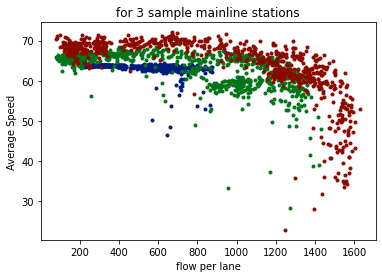

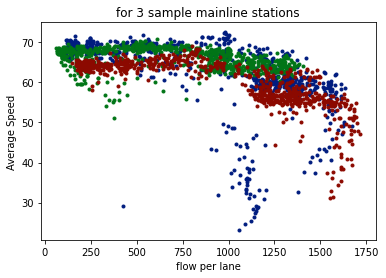

In [ ]:
samplestationlist = MLstations.head(6)['StationID']
samplestationlist.drop_duplicates
print(samplestationlist)
i=0
for station in samplestationlist:
  i+=1
  sampleStation = MLstations[MLstations['StationID']==station]
  scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=sampleStation, marker='o', markersize=3)
  plt.xlabel('flow per lane')
  plt.ylabel('Average Speed')
  plt.title('for 3 sample mainline stations')
  if (i>2):
    plt.show()
    i=0

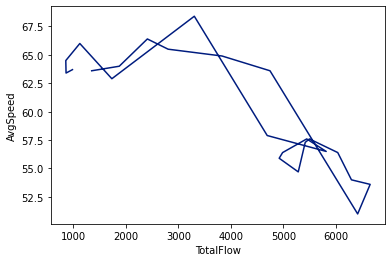

In [ ]:
i=0
for station in samplestationlist[5:7]:
  i+=1
  sampleStation = MLstations[MLstations['StationID']==station]
  sampleStationDay = sampleStation.head(24)
  plot = sns.lineplot(x=sampleStationDay['TotalFlow'], y=sampleStationDay['AvgSpeed'], sort=False)
  plt.show()


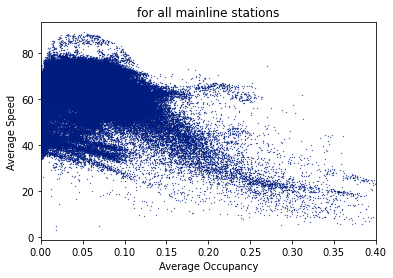

In [ ]:
dscatter = plt.plot('AvgOccupancy', 'AvgSpeed', linestyle='', data=MLstations, marker='o', markersize=.3)
plt.xlabel('Average Occupancy')
plt.ylabel('Average Speed')
plt.title('for all mainline stations')
plt.xlim(0,0.4)
plt.show()

In [ ]:
print(df['TotalFlow'].max())
df.loc[[df['TotalFlow'].idxmax()]]
#stationID: 313822


13656.0


,Timestamp,StationID,FreewayNum,DirectionOfTravel,LaneType,StationLength,Samples,%Observed,TotalFlow,AvgOccupancy,AvgSpeed,numLanes
919555,10/30/2020 16:00:00,313822,50,W,ML,0.859,280,67,13656.0,0.2527,67.2,4.0


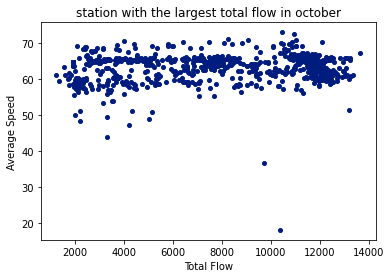

In [ ]:
sampleStation = MLstations[MLstations['StationID']==313822]

scatter = plt.plot('TotalFlow', 'AvgSpeed', linestyle='', data=sampleStation, marker='o', markersize=4)
plt.xlabel('Total Flow')
plt.ylabel('Average Speed')
plt.title('station with the largest total flow in october')
plt.show()
#the station with the largest total flow exhibits virtually no congestion and only has 4 lanes... why? 
#is the sensor having some issues?

In [ ]:
MLstations1ln = MLstations[MLstations['numLanes']==1]
MLstations2ln = MLstations[MLstations['numLanes']==2]
MLstations3ln = MLstations[MLstations['numLanes']==3]
MLstations4ln = MLstations[MLstations['numLanes']==4]
MLstations5ln = MLstations[MLstations['numLanes']==5]
MLstations6ln = MLstations[MLstations['numLanes']==6]


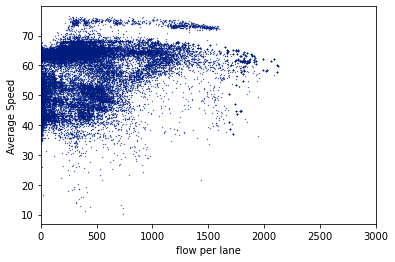

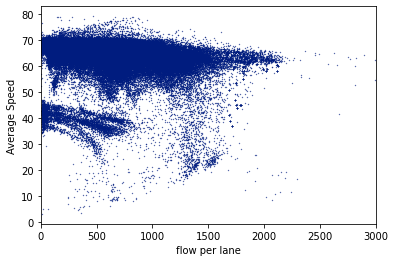

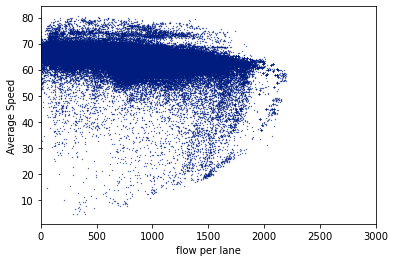

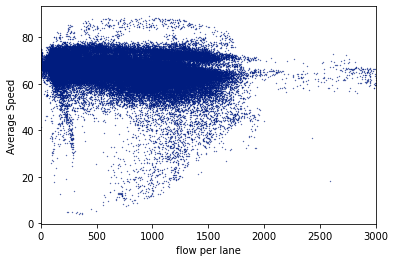

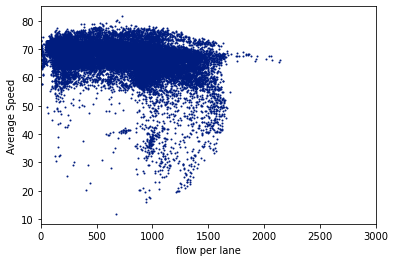

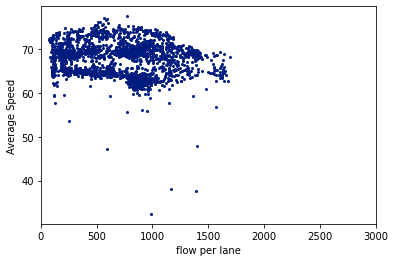

In [ ]:
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations1ln, marker='o', markersize=0.3)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations2ln, marker='o', markersize=0.3)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations3ln, marker='o', markersize=0.3)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations4ln, marker='o', markersize=0.3)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations5ln, marker='o', markersize=1)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()
scatter = plt.plot('flowPerLane', 'AvgSpeed', linestyle='', data=MLstations6ln, marker='o', markersize=2)
plt.xlabel('flow per lane')
plt.ylabel('Average Speed')
plt.xlim(0,3000)
plt.show()

In [ ]:
print(MLstations.TotalFlow)

0          447.0
6          905.0
9         1105.0
11         927.0
14         542.0
           ...  
960643    1038.0
960646    1103.0
960650    1664.0
960651     450.0
960652     457.0
Name: TotalFlow, Length: 442611, dtype: float64


In [ ]:
t = "03.08.2012 07.11.15 PM"
#10/30/2020 16:00:00
u = datetime.datetime.strptime(t, "%d.%m.%Y %I.%M.%S %p")
u
datetime.datetime(2012, 8, 3, 19, 11, 15)
u.strftime("%I:%M:%S %p")
'07:11:15 PM'

'07:11:15 PM'

In [ ]:
#MLstations.drop('DateTime', axis=1, inplace=True)

In [ ]:
MLstations.reset_index(drop=True)
MLstations['DateTime'] =  pd.to_datetime(MLstations['Timestamp'])

print(MLstations.head)

#print(df['TotalFlow'].max())
#df.loc[[df['TotalFlow'].idxmax()]]

<bound method NDFrame.head of                   Timestamp  StationID  ...  flowPerLane            DateTime
0       10/01/2020 00:00:00     308512  ...   223.500000 2020-10-01 00:00:00
6       10/01/2020 00:00:00     311903  ...   301.666667 2020-10-01 00:00:00
9       10/01/2020 00:00:00     311974  ...   221.000000 2020-10-01 00:00:00
11      10/01/2020 00:00:00     312010  ...   185.400000 2020-10-01 00:00:00
14      10/01/2020 00:00:00     312098  ...   135.500000 2020-10-01 00:00:00
...                     ...        ...  ...          ...                 ...
960643  10/31/2020 23:00:00    3075061  ...   346.000000 2020-10-31 23:00:00
960646  10/31/2020 23:00:00    3075081  ...   367.666667 2020-10-31 23:00:00
960650  10/31/2020 23:00:00    3076022  ...   416.000000 2020-10-31 23:00:00
960651  10/31/2020 23:00:00    3084071  ...   225.000000 2020-10-31 23:00:00
960652  10/31/2020 23:00:00    3084081  ...   228.500000 2020-10-31 23:00:00

[442611 rows x 14 columns]>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MLstations['Hour'] = MLstations['DateTime'].dt.hour
print(MLstations.head)

<bound method NDFrame.head of                   Timestamp  StationID  ...            DateTime Hour
0       10/01/2020 00:00:00     308512  ... 2020-10-01 00:00:00    0
6       10/01/2020 00:00:00     311903  ... 2020-10-01 00:00:00    0
9       10/01/2020 00:00:00     311974  ... 2020-10-01 00:00:00    0
11      10/01/2020 00:00:00     312010  ... 2020-10-01 00:00:00    0
14      10/01/2020 00:00:00     312098  ... 2020-10-01 00:00:00    0
...                     ...        ...  ...                 ...  ...
960643  10/31/2020 23:00:00    3075061  ... 2020-10-31 23:00:00   23
960646  10/31/2020 23:00:00    3075081  ... 2020-10-31 23:00:00   23
960650  10/31/2020 23:00:00    3076022  ... 2020-10-31 23:00:00   23
960651  10/31/2020 23:00:00    3084071  ... 2020-10-31 23:00:00   23
960652  10/31/2020 23:00:00    3084081  ... 2020-10-31 23:00:00   23

[442611 rows x 15 columns]>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
MLstations['Day'] = MLstations['DateTime'].dt.day
print(MLstations.head)

<bound method NDFrame.head of                   Timestamp  StationID  ...  Hour Day
0       10/01/2020 00:00:00     308512  ...     0   1
6       10/01/2020 00:00:00     311903  ...     0   1
9       10/01/2020 00:00:00     311974  ...     0   1
11      10/01/2020 00:00:00     312010  ...     0   1
14      10/01/2020 00:00:00     312098  ...     0   1
...                     ...        ...  ...   ...  ..
960643  10/31/2020 23:00:00    3075061  ...    23  31
960646  10/31/2020 23:00:00    3075081  ...    23  31
960650  10/31/2020 23:00:00    3076022  ...    23  31
960651  10/31/2020 23:00:00    3084071  ...    23  31
960652  10/31/2020 23:00:00    3084081  ...    23  31

[442611 rows x 16 columns]>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(MLstations['Hour'].describe())
print(MLstations['Day'].describe())

#hourly = pd.DataFrame()
#plot = plt.bar('Hour', 'flowPerLane', data=MLstations)
#plt.show()

#MLstations.plot.bar(x='Hour', y='flowPerLane')
#for i in range(24):
#  hour_i = MLstations[MLstations['Hour']==i]
#  print(hour_i.head())

count    442611.000000
mean         11.499922
std           6.922236
min           0.000000
25%           5.000000
50%          11.000000
75%          17.000000
max          23.000000
Name: Hour, dtype: float64
count    442611.000000
mean         15.986704
std           8.944911
min           1.000000
25%           8.000000
50%          16.000000
75%          24.000000
max          31.000000
Name: Day, dtype: float64


In [ ]:
MLstations.to_csv('/content/gdrive/My Drive/urban economics/clean_station_hrly.csv', index=False)

In [ ]:
y = MLstations['flowPerLane']
X = MLstations.drop(['flowPerLane', 'TotalFlow', 'Timestamp', 'LaneType'], axis=1)
X['FreewayNum'] = X['FreewayNum'].apply(str)
X['StationID'] = X['StationID'].apply(str)
X['Hour'] = X['Hour'].apply(str)
X['Day'] = X['Day'].apply(str)
X['numLanes'] = X['numLanes'].apply(int)
X['Freeway'] = X['FreewayNum'] + X['DirectionOfTravel']
X.drop(['FreewayNum', 'DirectionOfTravel'], axis=1, inplace=True)
X.drop(['DateTime'], axis=1, inplace=True)
print(X.dtypes)
X = pd.get_dummies(X, drop_first=True)
print(X.head)
print(X.columns)

StationID         object
StationLength    float64
Samples            int64
%Observed          int64
AvgOccupancy     float64
AvgSpeed         float64
numLanes           int64
Hour              object
Day               object
Freeway           object
dtype: object
<bound method NDFrame.head of         StationLength  Samples  ...  Freeway_99N  Freeway_99S
0               3.995      225  ...            0            0
6               0.883      356  ...            0            0
9               0.466      595  ...            0            0
11              1.218      595  ...            0            0
14              0.483      476  ...            0            0
...               ...      ...  ...          ...          ...
960643          1.979      360  ...            0            0
960646          1.603      360  ...            0            0
960650          0.552      480  ...            0            0
960651          5.000        0  ...            0            0
960652          5.000   

In [ ]:
X = MLstations #.drop(['flowPerLane', 'TotalFlow', 'Timestamp', 'LaneType'], axis=1)
print(X.head())
print(X.columns)
#X.drop(['Timestamp'], axis=1, inplace=True)
#X['FreewayNum'] = X['FreewayNum'].apply(str)
X['StationID'] = X['StationID'].apply(str)
X['Hour'] = X['Hour'].apply(str)
X['Day'] = X['Day'].apply(str)
X['numLanes'] = X['numLanes'].apply(str)
#X['Freeway'] = X['FreewayNum'] + X['DirectionOfTravel']
#X.drop(['FreewayNum', 'DirectionOfTravel'], axis=1, inplace=True)
#X.drop(['DateTime'], axis=1, inplace=True)
print(X.dtypes)
X = pd.get_dummies(X, drop_first=True)
print(X.head)
print(X.columns)

X.to_csv('/content/gdrive/My Drive/urban economics/dummy_station_hrly.csv', index=False)

   StationID LaneType  StationLength  Samples  ...   DateTime  Hour  Day  Freeway
0     308512       ML          3.995      225  ... 2020-10-01     0    1      50W
6     311903       ML          0.883      356  ... 2020-10-01     0    1      50E
9     311974       ML          0.466      595  ... 2020-10-01     0    1      50E
11    312010       ML          1.218      595  ... 2020-10-01     0    1      50W
14    312098       ML          0.483      476  ... 2020-10-01     0    1      50E

[5 rows x 14 columns]
Index(['StationID', 'LaneType', 'StationLength', 'Samples', '%Observed',
       'TotalFlow', 'AvgOccupancy', 'AvgSpeed', 'numLanes', 'flowPerLane',
       'DateTime', 'Hour', 'Day', 'Freeway'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

StationID                object
LaneType                 object
StationLength           float64
Samples                   int64
%Observed                 int64
TotalFlow               float64
AvgOccupancy            float64
AvgSpeed                float64
numLanes                 object
flowPerLane             float64
DateTime         datetime64[ns]
Hour                     object
Day                      object
Freeway                  object
dtype: object
<bound method NDFrame.head of         StationLength  Samples  ...  Freeway_99N  Freeway_99S
0               3.995      225  ...            0            0
6               0.883      356  ...            0            0
9               0.466      595  ...            0            0
11              1.218      595  ...            0            0
14              0.483      476  ...            0            0
...               ...      ...  ...          ...          ...
960643          1.979      360  ...            0            0
960646      

In [ ]:

ols = linear_model.LinearRegression()
ols.fit(X, y)
print(len(ols.coef_))

679


In [ ]:
from sklearn.linear_model import LassoCV

las = LassoCV()
las.fit(X, y)
#print(las.coef_)

list(X.columns)
word_list = list()
best_vars = list()

for i in range(len(las.coef_)):
  if abs(las.coef_[i])>0.0001:
    word_list.append((list(X.columns)[i], round(las.coef_[i], 3)))
    best_vars.append(list(X.columns)[i])
    #print(las.coef_[i])
    #print(list(X.columns)[i]

#print(word_list)

def custom_sort(t):
    return abs(t[1])

word_list.sort(key=custom_sort, reverse=True)
print(word_list)


coef_dict = {}
for coef, feat in zip(las.coef_, X.columns):
    coef_dict[feat] = coef

[('Hour_2', -313.331), ('Hour_1', -299.225), ('Hour_3', -293.752), ('Hour_4', -211.726), ('Hour_23', -180.475), ('Hour_16', 154.533), ('Hour_15', 153.44), ('Hour_17', 120.88), ('Hour_14', 102.24), ('StationLength', -82.657), ('Hour_22', -79.785), ('Hour_13', 56.287), ('Hour_12', 33.33), ('Freeway_50E', -21.161), ('AvgSpeed', -13.051), ('%Observed', -1.113), ('numLanes', 0.858), ('Samples', 0.362)]


In [ ]:
word_list = sorted(word_list)
print(word_list)

[('%Observed', -1.113), ('AvgSpeed', -13.051), ('Freeway_50E', -21.161), ('Hour_1', -299.225), ('Hour_12', 33.33), ('Hour_13', 56.287), ('Hour_14', 102.24), ('Hour_15', 153.44), ('Hour_16', 154.533), ('Hour_17', 120.88), ('Hour_2', -313.331), ('Hour_22', -79.785), ('Hour_23', -180.475), ('Hour_3', -293.752), ('Hour_4', -211.726), ('Samples', 0.362), ('StationLength', -82.657), ('numLanes', 0.858)]


In [ ]:
import math
MLstations = MLstations[MLstations['flowPerLane'] > 1]  

print(MLstations['flowPerLane'].head)
#y = MLstations['flowPerLane'].apply(math.log)
#for i in MLstations['flowPerLane']:
#  print(i)
#  print(math.log(i))

#df['add'] = df.apply(lambda row : math.log(MLstations['flowPerLane']), axis = 1)
#y = df['add']
X = MLstations.drop(['flowPerLane', 'TotalFlow', 'Timestamp', 'LaneType', 'StationID', 'FreewayNum', 'DirectionOfTravel', 'Day', 'DateTime'], axis=1)
#X['FreewayNum'] = X['FreewayNum'].apply(str)
#X['StationID'] = X['StationID'].apply(str)
X['Hour'] = X['Hour'].apply(str)
#X['Day'] = X['Day'].apply(str)
X['numLanes'] = X['numLanes'].apply(str)
#X['Freeway'] = X['FreewayNum'] + X['DirectionOfTravel']
#X.drop(['FreewayNum', 'DirectionOfTravel'], axis=1, inplace=True)
#X.drop(['DateTime'], axis=1, inplace=True)
print(X.dtypes)
X = pd.get_dummies(X, drop_first=True)
print(X.head)
print(y.head)

<bound method NDFrame.head of 0         223.500000
6         301.666667
9         221.000000
11        185.400000
14        135.500000
             ...    
960643    346.000000
960646    367.666667
960650    416.000000
960651    225.000000
960652    228.500000
Name: flowPerLane, Length: 442295, dtype: float64>
StationLength    float64
Samples            int64
%Observed          int64
AvgOccupancy     float64
AvgSpeed         float64
numLanes          object
Hour              object
dtype: object
<bound method NDFrame.head of         StationLength  Samples  %Observed  ...  Hour_7  Hour_8  Hour_9
0               3.995      225          0  ...       0       0       0
6               0.883      356        100  ...       0       0       0
9               0.466      595        100  ...       0       0       0
11              1.218      595        100  ...       0       0       0
14              0.483      476        100  ...       0       0       0
...               ...      ...        ...  

In [ ]:
las = LassoCV()
las.fit(X, y)
#print(las.coef_)

list(X.columns)
word_list = list()
best_vars = list()

for i in range(len(las.coef_)):
  if abs(las.coef_[i])>0.0001:
    word_list.append((list(X.columns)[i], round(las.coef_[i], 3)))
    best_vars.append(list(X.columns)[i])
    #print(las.coef_[i])
    #print(list(X.columns)[i])

#print(word_list)

def custom_sort(t):
    return abs(t[1])

word_list.sort(key=custom_sort, reverse=True)
print(word_list)


ValueError: ignored

In [ ]:
#for i in MLstations.head():
#  print(MLstations['Hour'].loc[i])
#  if MLstations['Hour'] is 0:
#    print('True')


KeyError: ignored

In [ ]:
MLstations['flowPerLane'][0]

223.5

In [ ]:
print(X.columns)

Index(['StationLength', 'Samples', '%Observed', 'AvgOccupancy', 'AvgSpeed',
       'numLanes_2.0', 'numLanes_3.0', 'numLanes_4.0', 'numLanes_5.0',
       'numLanes_6.0', 'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_2', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9'],
      dtype='object')


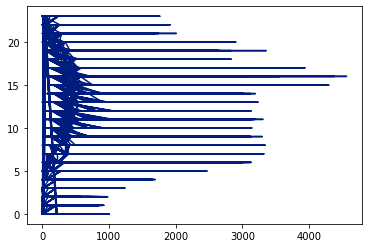

In [ ]:
plt.plot('flowPerLane', 'Hour', data=MLstations)


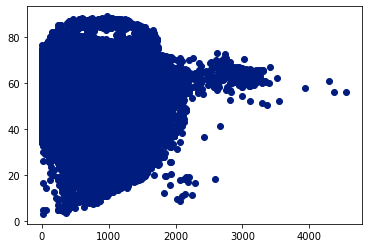

In [ ]:
plt.scatter('flowPerLane', 'AvgSpeed', data=MLstations)
